# A simple tutorial for iMVP-utils API

## 0. Load functions

In [1]:
from iMVP_utils import embedding,clustering, utils, plots

## 1. Load fasta file

In [2]:
df = utils.load_sequences_from_fasta("./input/test.fa")

In [3]:
df

,seq,site
0,TCAAGTACGCCTCCAACTTCC,"('2L@10201923@+',"
1,ATTGAATTTGCTCTACAACCA,"('2L@10206142@-',"
2,TCCATTCACCCTCCAGGAGAA,"('2L@10304620@-',"
3,GCTTTAACACCTCCAAAAAGC,"('2L@10423573@+',"
4,CCTGCTCATCCTCAAGGACAC,"('2L@10489508@+',"
...,...,...
8397,AACGAGAGTCCGGCTGAAAAG,"('XHet@68785@-',"
8398,TAACGAGAGTCCGGCTGAAAA,"('XHet@68786@-',"
8399,TCACACCTATCGTGGGCATCG,"('XHet@77281@+',"
8400,GTTGAGGAAGCACTTGAAGAA,"('YHet@328017@-',"


## 3. Generate one-hot encoded input

In [4]:
df_onehot = embedding.onehot_encoder_df(df)

In [5]:
df_onehot[0]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

## 4. Run UMAP

In [6]:
df_UMAP = embedding.run_UMAP(df_onehot, df=df, init='random', random_state=42, min_dist=0.01, n_neighbors=20, densmap=False, verbose=True, n_jobs=6)

UMAP(init='random', min_dist=0.01, n_jobs=6, n_neighbors=20, random_state=42, verbose=True)
Thu Mar 10 16:20:55 2022 Construct fuzzy simplicial set
Thu Mar 10 16:20:55 2022 Finding Nearest Neighbors
Thu Mar 10 16:20:55 2022 Building RP forest with 10 trees
Thu Mar 10 16:20:55 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Thu Mar 10 16:23:23 2022 Finished Nearest Neighbor Search
Thu Mar 10 16:23:26 2022 Construct embedding



Thu Mar 10 16:23:48 2022 Finished embedding


In [7]:
df_UMAP

,seq,site,X,Y
0,TCAAGTACGCCTCCAACTTCC,"('2L@10201923@+',",11.029230,5.040139
1,ATTGAATTTGCTCTACAACCA,"('2L@10206142@-',",10.386844,4.118184
2,TCCATTCACCCTCCAGGAGAA,"('2L@10304620@-',",10.442229,4.469188
3,GCTTTAACACCTCCAAAAAGC,"('2L@10423573@+',",10.383232,5.025059
4,CCTGCTCATCCTCAAGGACAC,"('2L@10489508@+',",10.940475,4.146748
...,...,...,...,...
8397,AACGAGAGTCCGGCTGAAAAG,"('XHet@68785@-',",8.416724,2.773036
8398,TAACGAGAGTCCGGCTGAAAA,"('XHet@68786@-',",9.894358,1.499758
8399,TCACACCTATCGTGGGCATCG,"('XHet@77281@+',",8.377650,0.984917
8400,GTTGAGGAAGCACTTGAAGAA,"('YHet@328017@-',",11.084383,2.396641


## 5. Run HDBSCAN

HDBSCAN cluster number: 2
Cluster
1     904
2    7498
Name: Cluster, dtype: int64


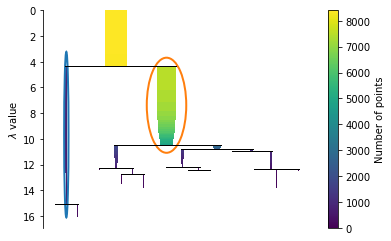

In [8]:
df_HDBSCAN, HDBSCA_Model = clustering.run_HDBSCAN(df=df_UMAP, soft_clustering=True, min_cluster_size=100, min_samples=10, cluster_selection_epsilon=0.0, cluster_selection_method='eom', draw_condensed_tree=True, core_dist_n_jobs=6)

In [9]:
df_HDBSCAN

,seq,site,X,Y,Cluster
0,TCAAGTACGCCTCCAACTTCC,"('2L@10201923@+',",11.029230,5.040139,1
1,ATTGAATTTGCTCTACAACCA,"('2L@10206142@-',",10.386844,4.118184,1
2,TCCATTCACCCTCCAGGAGAA,"('2L@10304620@-',",10.442229,4.469188,1
3,GCTTTAACACCTCCAAAAAGC,"('2L@10423573@+',",10.383232,5.025059,1
4,CCTGCTCATCCTCAAGGACAC,"('2L@10489508@+',",10.940475,4.146748,1
...,...,...,...,...,...
8397,AACGAGAGTCCGGCTGAAAAG,"('XHet@68785@-',",8.416724,2.773036,2
8398,TAACGAGAGTCCGGCTGAAAA,"('XHet@68786@-',",9.894358,1.499758,2
8399,TCACACCTATCGTGGGCATCG,"('XHet@77281@+',",8.377650,0.984917,2
8400,GTTGAGGAAGCACTTGAAGAA,"('YHet@328017@-',",11.084383,2.396641,2


## 6. (Optional) Draww 2-D histogram

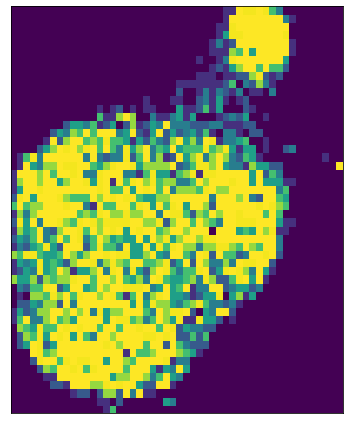

In [10]:
_ = plots.draw_2D_hist(df_HDBSCAN, vmax=0.05, density=True, xlim=None, ylim=None, bins=[50, 50])

## 7. Draw scatter

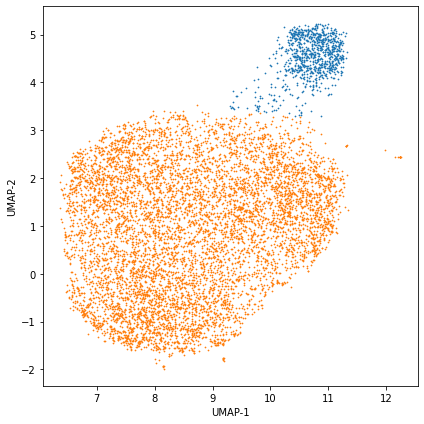

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[6,6])
for i in [1,2]:
    subdf = df_HDBSCAN[df_HDBSCAN["Cluster"]==i]
    ax.scatter(subdf["X"], subdf["Y"], lw=0, s=3)
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
plt.tight_layout()

## 8. Extract fasta and draw logos

In [12]:
utils.extract_fasta_and_draw_motifs("./test", df_HDBSCAN, cluster_col='Cluster', filter=None, motif_column='seq', draw_logos=True)

===============  ./test ===============
Cluster #1: 904
Cluster #2: 7498


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dd652e50>,
      dtype=object)

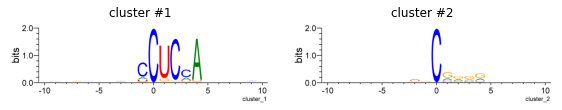

In [13]:
# png only
plots.show_logos_cols("./test/logos_bits_png", names=None, cols=2, auto_size=True, auto_width=4, auto_height=1.5, dpi=300)

## 9. Save csv

In [14]:
df_HDBSCAN.to_csv("test.csv")